## 逐次特徴選択アルゴリズム
d次元データをk次元にまで削減する。評価関数を小さくできる特徴量のみを残すようにする操作
SBS(Sequential Backward)   
もとの特徴量は変換されずそのままの形を維持するため、シンプル

In [1]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class SBS:
    def __init__(self,estimator,k_features,scoring=accuracy_score,test_size=0.25,random_state=1):
        self.scoring=scoring
        self.estimator=clone(estimator)
        self.k_features=k_features
        self.test_size=test_size
        self.random_state=random_state
        
    def fit(self,X,y):
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=self.test_size,random_state=self.random_state)
        # 特徴量の数dim
        dim=X_train.shape[1]
        self.indices_=tuple(range(dim))
        self.subsets_=[self.indices_]
        #　全特徴量でスコアを求める
        score=self._calc_score(X_train,y_train,X_test,y_test,self.indices_)
        self.scores_=[score]
        # 指定した特徴量になるまで特徴量を削減する
        while dim>self.k_features:
            scores=[]
            subsets=[]
            
            for p in combinations(self.indices_,r=dim-1):
                score=self._calc_score(X_train,y_train,X_test,y_test,p)
                scores.append(score)
                subsets.append(p)
         # scoreが最もよかった組み合わせのインデックスを取得       
            best=np.argmax(scores)
        # socreが最もよかった特徴量を取得
            self.indices_=subsets[best]
            self.subsets_.append(self.indices_)
        # 一つ次元を削減
            dim-=1
            
            self.scores_.append(scores[best])
        self.k_score_=self.scores_[-1]
        
        return self
    
    def transform(self,X):
        # 最後に残った特徴量を返す
        return X[:,self.indices_]
        
    def _calc_score(self,X_train,y_train,X_test,y_test,indices):
        self.estimator.fit(X_train[:,indices],y_train)
        y_pred=self.estimator.predict(X_test[:,indices])
        score=accuracy_score(y_test,y_pred)
        return score

C:\Users\nsats\Anaconda3\envs\gpu-env\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
import numpy as np
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))

df_wine.head()


C:\Users\nsats\Anaconda3\envs\gpu-env\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
from sklearn.model_selection import train_test_split
X=df_wine.iloc[:,1:]
y=df_wine.iloc[:,0]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train_std=ss.fit_transform(X_train)
X_test_std=ss.fit_transform(X_test)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
knn=KNeighborsClassifier(n_neighbors=2)
sbs=SBS(knn,k_features=1)
sbs.fit(X_train_std,y_train)

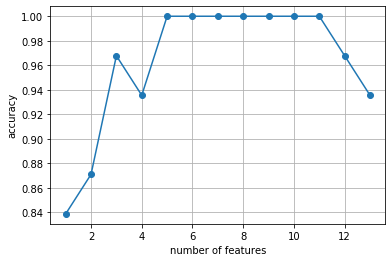

In [6]:
k_feat=[len(k) for k in sbs.subsets_]
plt.plot(k_feat,sbs.scores_,marker='o')
plt.ylabel('accuracy')
plt.xlabel('number of features')
plt.grid()
plt.show()

In [8]:
k5 = list(sbs.subsets_[8])
print(df_wine.columns[1:][k5])

knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

knn.fit(X_train_std[:, k5], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k5], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k5], y_test))

Index(['Alcohol', 'Malic acid', 'Alcalinity of ash', 'Hue', 'Proline'], dtype='object')
Training accuracy: 0.9838709677419355
Test accuracy: 0.9444444444444444
Training accuracy: 0.9596774193548387
Test accuracy: 0.9259259259259259
